<a href="https://colab.research.google.com/github/lalitha-sahitya/CrimeCast-Forecasting-Crime-Categories/blob/main/CrimeCast_Forcasting_Crime_Categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download('https://www.kaggle.com/competitions/crime-cast-forecasting-crime-categories')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········


100%|██████████| 1.05M/1.05M [00:00<00:00, 61.7MB/s]


Extracting archive ./crime-cast-forecasting-crime-categories/crime-cast-forecasting-crime-categories.zip to ./crime-cast-forecasting-crime-categories


In [49]:
os.listdir('crime-cast-forecasting-crime-categories')

['train.csv', 'sample.csv', 'test.csv']

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data=pd.read_csv('/content/crime-cast-forecasting-crime-categories/train.csv')
data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [53]:
test_data=pd.read_csv('/content/crime-cast-forecasting-crime-categories/test.csv')
test_data

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4600 MASCOT ST,NaN,34.0409,-118.3408,06/05/2020 12:00:00 AM,06/04/2020 12:00:00 AM,2100.0,7.0,Wilshire,775.0,...,NaN,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont
4996,2200 E 7TH ST,NaN,34.0347,-118.2253,12/02/2020 12:00:00 AM,11/25/2020 12:00:00 AM,1530.0,4.0,Hollenbeck,471.0,...,1300 0325,0.0,X,X,116.0,OTHER/OUTSIDE,NaN,NaN,IC,Invest Cont
4997,LANGDON AV,TUPPER ST,34.2392,-118.4698,11/21/2020 12:00:00 AM,11/21/2020 12:00:00 AM,2100.0,19.0,Mission,1961.0,...,0913 1817 0416,38.0,M,H,101.0,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest
4998,400 E 5TH ST,NaN,34.0453,-118.2443,03/01/2020 12:00:00 AM,02/29/2020 12:00:00 AM,2335.0,1.0,Central,147.0,...,0416,41.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other


In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5000 non-null   object 
 1   Cross_Street           810 non-null    object 
 2   Latitude               5000 non-null   float64
 3   Longitude              5000 non-null   float64
 4   Date_Reported          5000 non-null   object 
 5   Date_Occurred          5000 non-null   object 
 6   Time_Occurred          5000 non-null   float64
 7   Area_ID                5000 non-null   float64
 8   Area_Name              5000 non-null   object 
 9   Reporting_District_no  5000 non-null   float64
 10  Part 1-2               5000 non-null   float64
 11  Modus_Operandi         4316 non-null   object 
 12  Victim_Age             5000 non-null   float64
 13  Victim_Sex             4357 non-null   object 
 14  Victim_Descent         4357 non-null   object 
 15  Prem

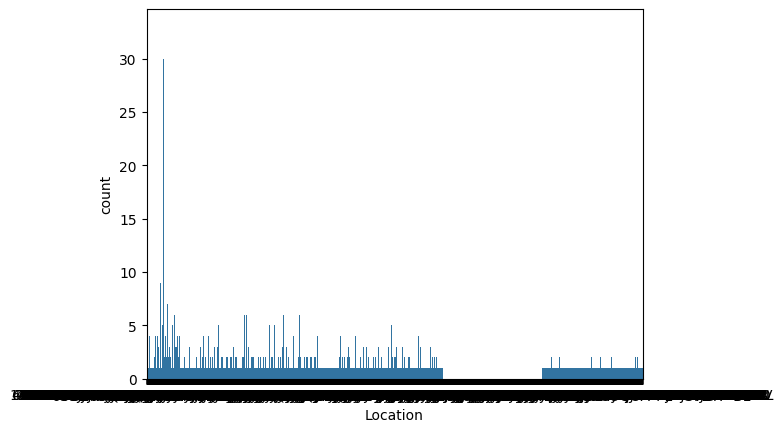

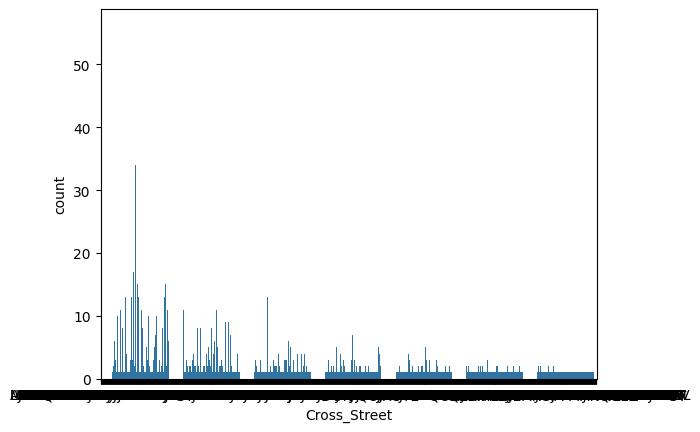

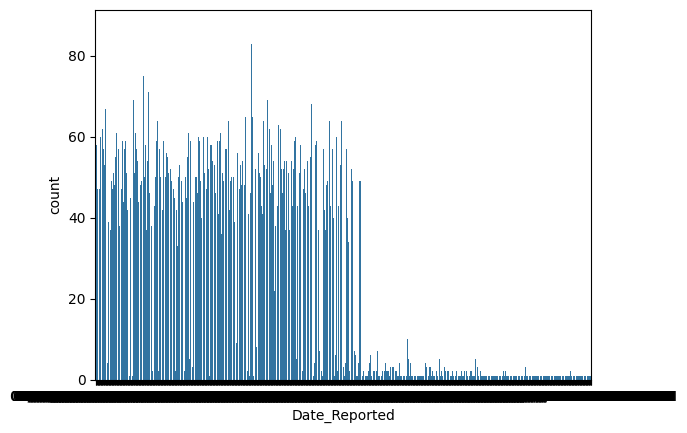

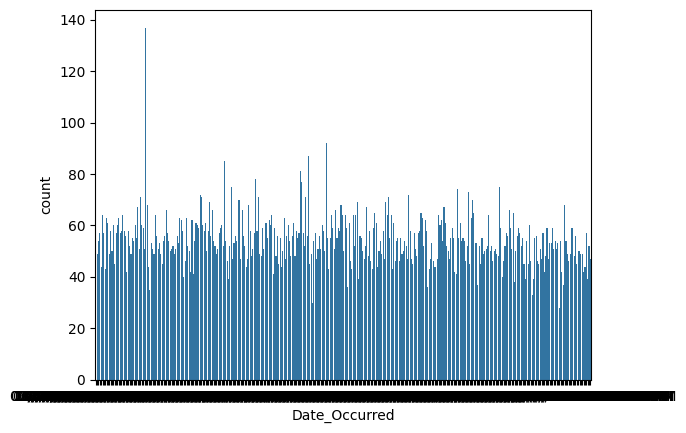

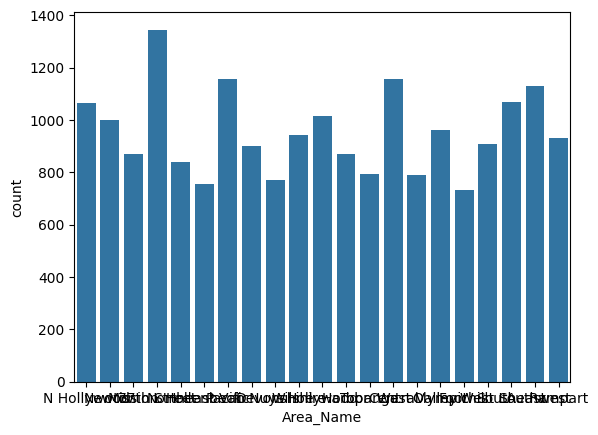

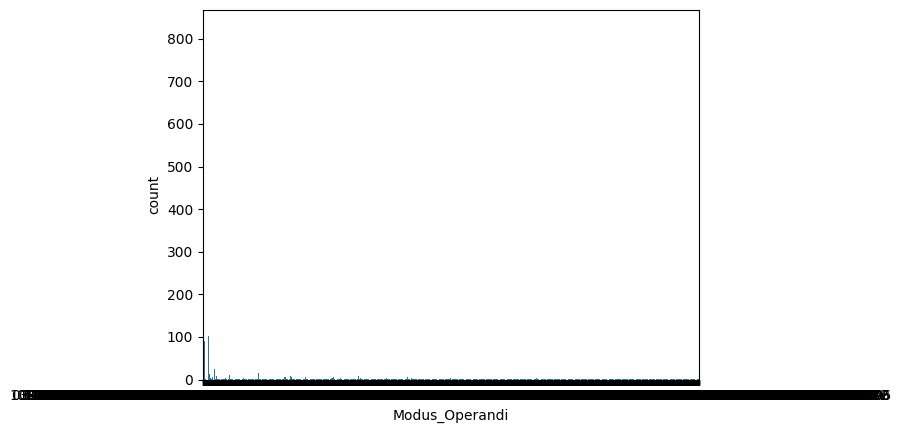

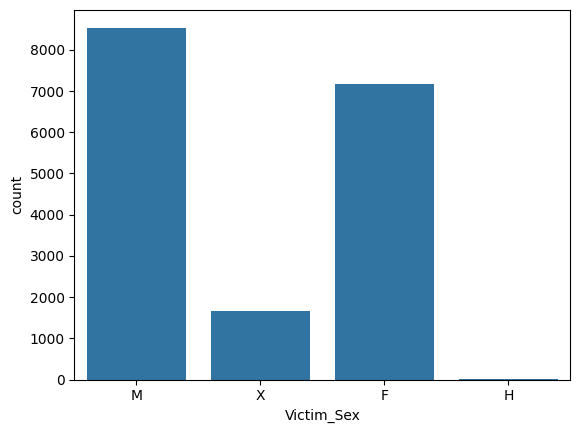

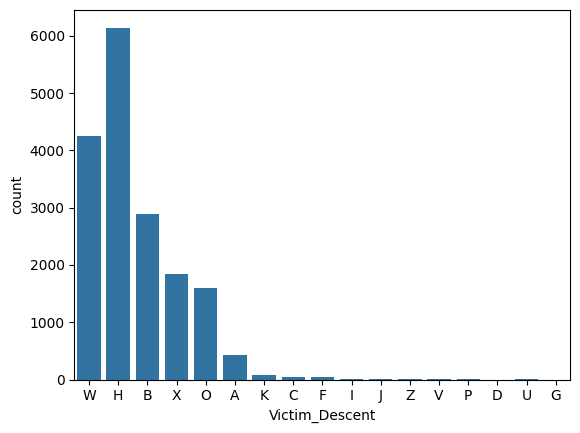

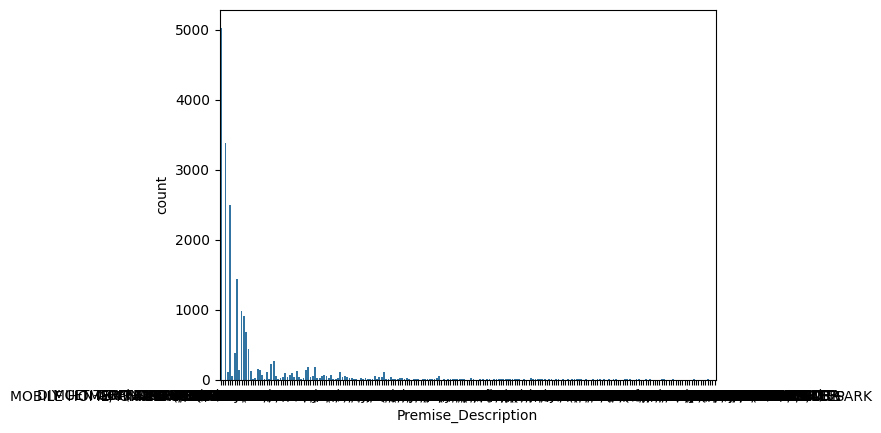

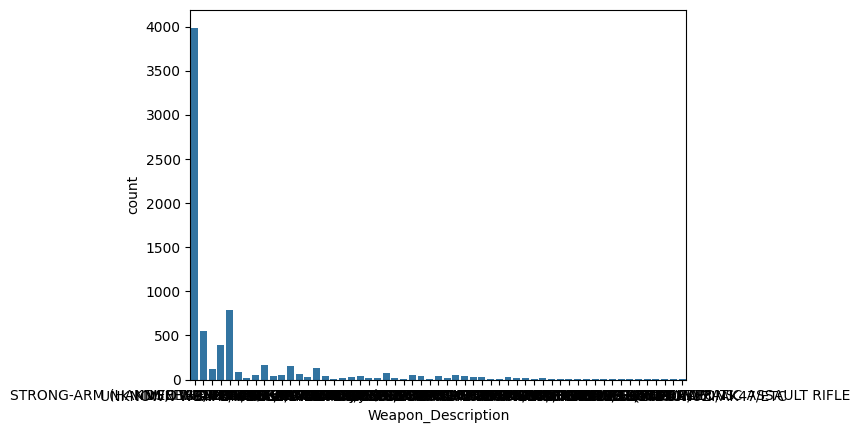

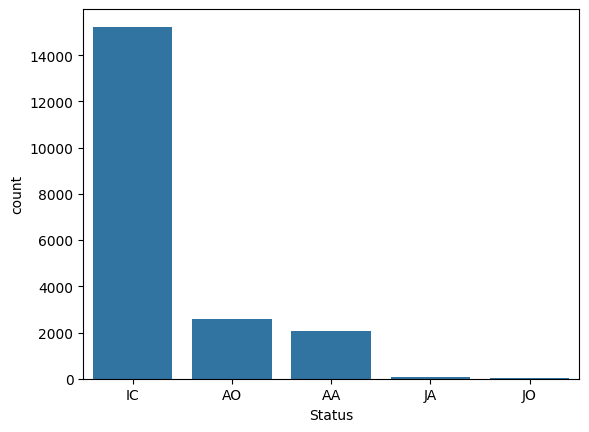

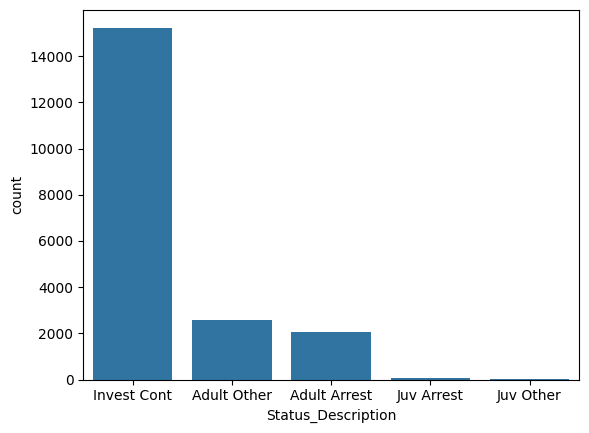

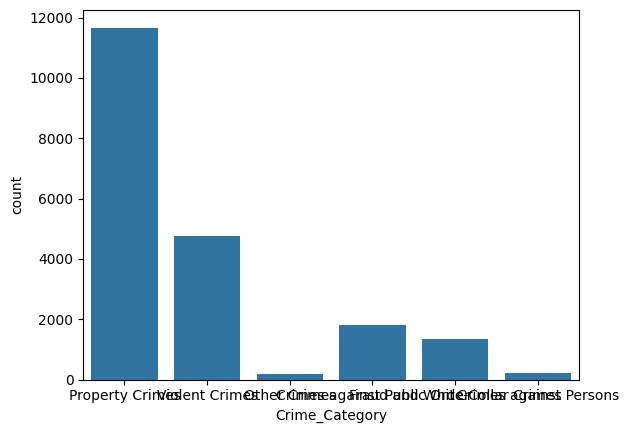

In [55]:
for i in data.select_dtypes(include='object').columns:
  sns.countplot(data=data,x=i)
  plt.show()

In [56]:
for i in data.select_dtypes(include='object').columns:
  print(i)
  print(data[i].unique())

Location
['4500    CARPENTER                    AV'
 '45TH                         ST'
 '600 E  MARTIN LUTHER KING JR        BL' ...
 '15800    STRATHERN                    ST'
 '5100 W  ADAMS                        BL'
 'DALTON                       AV']
Cross_Street
[nan 'ALAMEDA                      ST' 'LASSEN                       ST'
 ... 'VICTORIA' '39TH                         ST' 'HAVELOCK']
Date_Reported
['03/09/2020 12:00:00 AM' '02/27/2020 12:00:00 AM'
 '08/21/2020 12:00:00 AM' '11/08/2020 12:00:00 AM'
 '02/25/2020 12:00:00 AM' '01/10/2020 12:00:00 AM'
 '08/17/2020 12:00:00 AM' '10/07/2021 12:00:00 AM'
 '01/28/2020 12:00:00 AM' '07/07/2020 12:00:00 AM'
 '01/21/2020 12:00:00 AM' '06/11/2020 12:00:00 AM'
 '02/03/2020 12:00:00 AM' '02/22/2020 12:00:00 AM'
 '07/31/2020 12:00:00 AM' '09/08/2020 12:00:00 AM'
 '06/25/2020 12:00:00 AM' '09/11/2020 12:00:00 AM'
 '03/23/2020 12:00:00 AM' '02/12/2021 12:00:00 AM'
 '06/26/2020 12:00:00 AM' '07/26/2020 12:00:00 AM'
 '08/26/2020 12:00:00

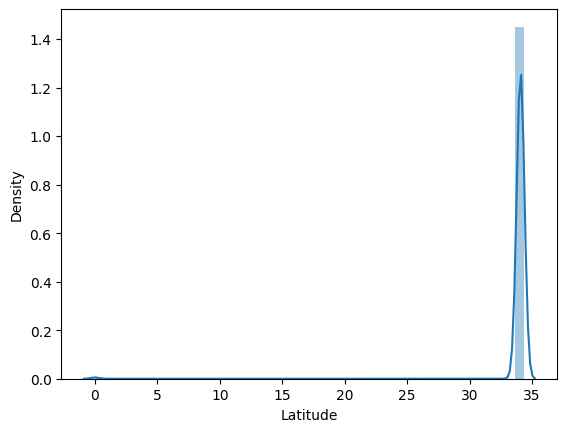

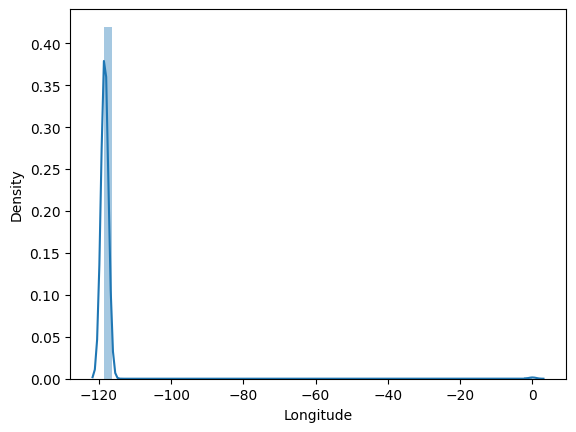

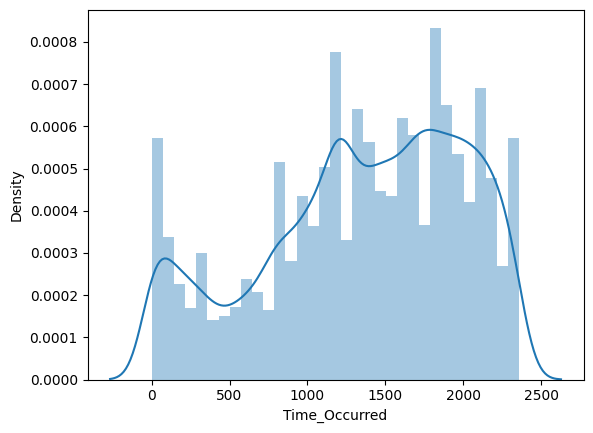

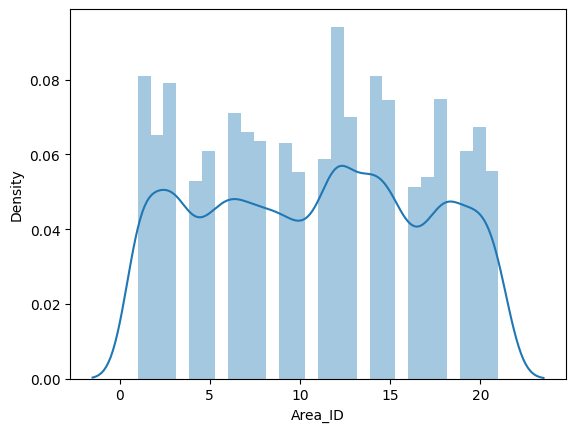

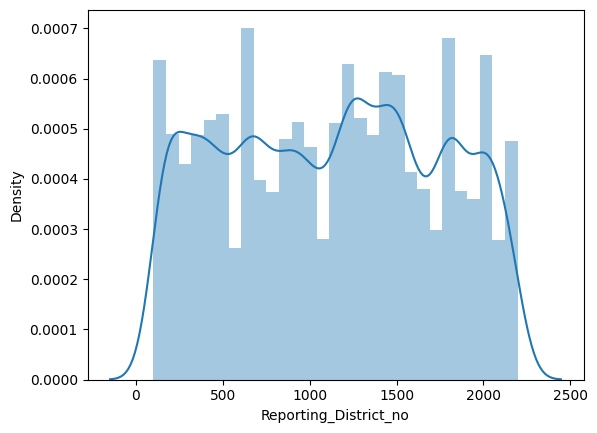

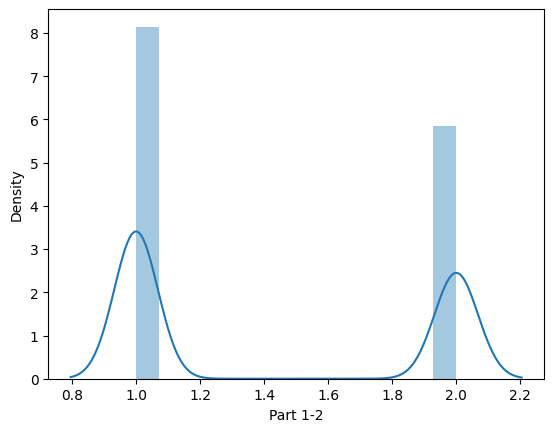

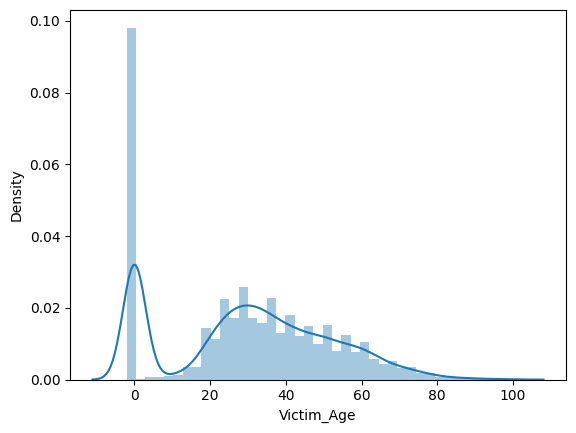

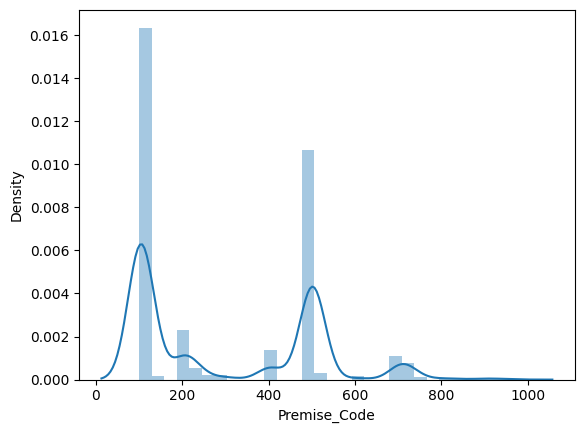

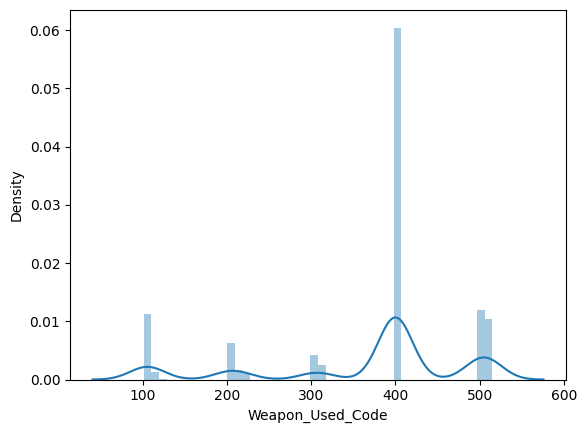

In [57]:
for i in data.select_dtypes(include='number').columns:
  sns.distplot(data[i])
  plt.show()

In [58]:
data['Crime_Category'].unique()

array(['Property Crimes', 'Violent Crimes', 'Other Crimes',
       'Crimes against Public Order', 'Fraud and White-Collar Crimes',
       'Crimes against Persons'], dtype=object)

In [59]:
data['Date_Occurred']

,Date_Occurred
0,03/06/2020 12:00:00 AM
1,02/27/2020 12:00:00 AM
2,08/21/2020 12:00:00 AM
3,11/06/2020 12:00:00 AM
4,02/25/2020 12:00:00 AM
...,...
19995,05/24/2020 12:00:00 AM
19996,12/25/2020 12:00:00 AM
19997,09/25/2020 12:00:00 AM
19998,06/10/2020 12:00:00 AM


In [60]:
data['Day_Occurred']=pd.to_datetime(data['Date_Occurred']).dt.day
data['Month_Occurred']=pd.to_datetime(data['Date_Occurred']).dt.month
data['Year_Occurred']=pd.to_datetime(data['Date_Occurred']).dt.year

In [61]:
test_data['Date_Occurred']

,Date_Occurred
0,03/03/2020 12:00:00 AM
1,04/25/2020 12:00:00 AM
2,08/27/2020 12:00:00 AM
3,12/03/2020 12:00:00 AM
4,08/29/2020 12:00:00 AM
...,...
4995,06/04/2020 12:00:00 AM
4996,11/25/2020 12:00:00 AM
4997,11/21/2020 12:00:00 AM
4998,02/29/2020 12:00:00 AM


In [62]:
test_data['Day_Occurred']=pd.to_datetime(test_data['Date_Occurred']).dt.day
test_data['Month_Occurred']=pd.to_datetime(test_data['Date_Occurred']).dt.month
test_data['Year_Occurred']=pd.to_datetime(test_data['Date_Occurred']).dt.year

In [63]:
data['Day_Reported']=pd.to_datetime(data['Date_Reported']).dt.day
data['Month_Reported']=pd.to_datetime(data['Date_Reported']).dt.month
data['Year_Reported']=pd.to_datetime(data['Date_Reported']).dt.year

In [64]:
test_data['Day_Reported']=pd.to_datetime(test_data['Date_Reported']).dt.day
test_data['Month_Reported']=pd.to_datetime(test_data['Date_Reported']).dt.month
test_data['Year_Reported']=pd.to_datetime(test_data['Date_Reported']).dt.year

In [65]:
data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Weapon_Description,Status,Status_Description,Crime_Category,Day_Occurred,Month_Occurred,Year_Occurred,Day_Reported,Month_Reported,Year_Reported
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,NaN,IC,Invest Cont,Property Crimes,6,3,2020,9,3,2020
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,27,2,2020,27,2,2020
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,NaN,IC,Invest Cont,Property Crimes,21,8,2020,21,8,2020
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,NaN,IC,Invest Cont,Property Crimes,6,11,2020,8,11,2020
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,25,2,2020,25,2,2020


In [66]:
data=data.drop(['Date_Occurred','Date_Reported'],axis=1)
test_data=test_data.drop(['Date_Occurred','Date_Reported'],axis=1)

In [67]:
data.head()

,Location,Cross_Street,Latitude,Longitude,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,...,Weapon_Description,Status,Status_Description,Crime_Category,Day_Occurred,Month_Occurred,Year_Occurred,Day_Reported,Month_Reported,Year_Reported
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,1800.0,15.0,N Hollywood,1563.0,1.0,0385,...,NaN,IC,Invest Cont,Property Crimes,6,3,2020,9,3,2020
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,27,2,2020,27,2,2020
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,605.0,13.0,Newton,1343.0,2.0,0329 1202,...,NaN,IC,Invest Cont,Property Crimes,21,8,2020,21,8,2020
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,1800.0,19.0,Mission,1924.0,1.0,0329 1300,...,NaN,IC,Invest Cont,Property Crimes,6,11,2020,8,11,2020
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,25,2,2020,25,2,2020


In [68]:
data['Days_taken_to_report']=data['Day_Reported']-data['Day_Occurred']
test_data['Days_taken_to_report']=test_data['Day_Reported']-test_data['Day_Occurred']

In [69]:
data['Months_taken_to_report']=data['Month_Reported']-data['Month_Occurred']
test_data['Months_taken_to_report']=test_data['Month_Reported']-test_data['Month_Occurred']

In [70]:
data['Years_taken_to_report']=data['Year_Reported']-data['Year_Occurred']
test_data['Years_taken_to_report']=test_data['Year_Reported']-test_data['Year_Occurred']

In [71]:
data=data.drop(['Year_Occurred','Month_Occurred','Year_Reported','Month_Reported'],axis=1)
test_data=test_data.drop(['Year_Occurred','Month_Occurred','Year_Reported','Month_Reported'],axis=1)

In [72]:
data=data.drop(['Day_Occurred','Day_Reported'],axis=1)
test_data=test_data.drop(['Day_Occurred','Day_Reported'],axis=1)

In [73]:
data.head()

,Location,Cross_Street,Latitude,Longitude,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,...,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category,Days_taken_to_report,Months_taken_to_report,Years_taken_to_report
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,1800.0,15.0,N Hollywood,1563.0,1.0,0385,...,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes,3,0,0
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,...,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,0,0,0
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,605.0,13.0,Newton,1343.0,2.0,0329 1202,...,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes,0,0,0
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,1800.0,19.0,Mission,1924.0,1.0,0329 1300,...,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes,2,0,0
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,...,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,0,0,0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                20000 non-null  object 
 1   Cross_Street            3448 non-null   object 
 2   Latitude                20000 non-null  float64
 3   Longitude               20000 non-null  float64
 4   Time_Occurred           20000 non-null  float64
 5   Area_ID                 20000 non-null  float64
 6   Area_Name               20000 non-null  object 
 7   Reporting_District_no   20000 non-null  float64
 8   Part 1-2                20000 non-null  float64
 9   Modus_Operandi          17259 non-null  object 
 10  Victim_Age              20000 non-null  float64
 11  Victim_Sex              17376 non-null  object 
 12  Victim_Descent          17376 non-null  object 
 13  Premise_Code            20000 non-null  float64
 14  Premise_Description     19995 non-null

In [75]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                5000 non-null   object 
 1   Cross_Street            810 non-null    object 
 2   Latitude                5000 non-null   float64
 3   Longitude               5000 non-null   float64
 4   Time_Occurred           5000 non-null   float64
 5   Area_ID                 5000 non-null   float64
 6   Area_Name               5000 non-null   object 
 7   Reporting_District_no   5000 non-null   float64
 8   Part 1-2                5000 non-null   float64
 9   Modus_Operandi          4316 non-null   object 
 10  Victim_Age              5000 non-null   float64
 11  Victim_Sex              4357 non-null   object 
 12  Victim_Descent          4357 non-null   object 
 13  Premise_Code            5000 non-null   float64
 14  Premise_Description     4999 non-null   

In [76]:
data=data.drop(['Cross_Street','Weapon_Used_Code','Weapon_Description'],axis=1)
test_data=test_data.drop(['Cross_Street','Weapon_Used_Code','Weapon_Description'],axis=1)

In [77]:
x=data.drop('Crime_Category',axis=1)
y=data['Crime_Category']

In [78]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in test_data.select_dtypes(include='object').columns:
  x[i]=enc.fit_transform(x[i])
  test_data[i]=enc.fit_transform(test_data[i])

In [79]:
y=enc.fit_transform(y)

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
x_train.shape

(16000, 19)

In [82]:
x_test.shape

(4000, 19)

In [83]:
y_train.shape

(16000,)

In [84]:
y_train

array([4, 5, 4, ..., 4, 5, 4])

In [85]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=pd.DataFrame(sc.fit_transform(x_train),columns=x.columns)
x_test=pd.DataFrame(sc.fit_transform(x_test),columns=x.columns)
test_data=pd.DataFrame(sc.fit_transform(test_data),columns=x.columns)

In [86]:
x_train.head()

,Location,Latitude,Longitude,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Status,Status_Description,Days_taken_to_report,Months_taken_to_report,Years_taken_to_report
0,0.915470,0.991191,0.003788,0.998304,0.15,0.25,0.184160,0.0,0.113738,0.267327,0.5,0.352941,0.000000,0.861111,0.5,0.5,0.516667,0.500000,0.0
1,0.608889,0.992155,0.003719,0.521204,0.15,0.25,0.162214,1.0,0.370865,0.306931,0.5,0.588235,0.003468,0.226852,0.5,0.5,0.500000,0.500000,0.0
2,0.000081,0.990005,0.001618,0.603902,0.65,0.60,0.634542,0.0,0.188769,0.257426,0.5,0.823529,0.463584,0.643519,0.5,0.5,0.500000,0.500000,0.0
3,0.754880,0.992875,0.002856,0.550891,0.25,0.30,0.274332,0.0,0.802269,0.514851,0.0,0.823529,0.700578,0.287037,0.5,0.5,0.533333,0.545455,0.0
4,0.823601,0.996726,0.002470,0.731128,0.75,0.15,0.756679,0.0,0.127944,0.326733,0.0,0.823529,0.117919,0.685185,0.5,0.5,0.533333,0.500000,0.0


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [88]:
models=[RandomForestClassifier(),LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier()]

In [90]:
for i in models:
  i.fit(x_train,y_train)
  print(i)
  preds=i.predict(x_test)
  print(accuracy_score(y_test,preds))
  print(classification_report(y_test,preds))
  print(confusion_matrix(y_test,preds))

RandomForestClassifier()
0.82375
              precision    recall  f1-score   support

           0       0.65      0.53      0.59        32
           1       0.62      0.29      0.39       374
           2       0.76      0.85      0.80       267
           3       0.29      0.06      0.10        35
           4       0.89      0.96      0.92      2303
           5       0.72      0.75      0.73       989

    accuracy                           0.82      4000
   macro avg       0.66      0.57      0.59      4000
weighted avg       0.81      0.82      0.81      4000

[[  17    0    2    0    0   13]
 [   2  107   30    3   78  154]
 [   0   11  226    0    9   21]
 [   0    7    5    2    5   16]
 [   0   11    8    1 2205   78]
 [   7   36   25    1  182  738]]
LogisticRegression()
0.708
              precision    recall  f1-score   support

           0       0.17      0.03      0.05        32
           1       0.40      0.06      0.11       374
           2       0.58      0.43  

In [91]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
preds=model.predict(x_test)
print(accuracy_score(y_test,preds))

0.82525


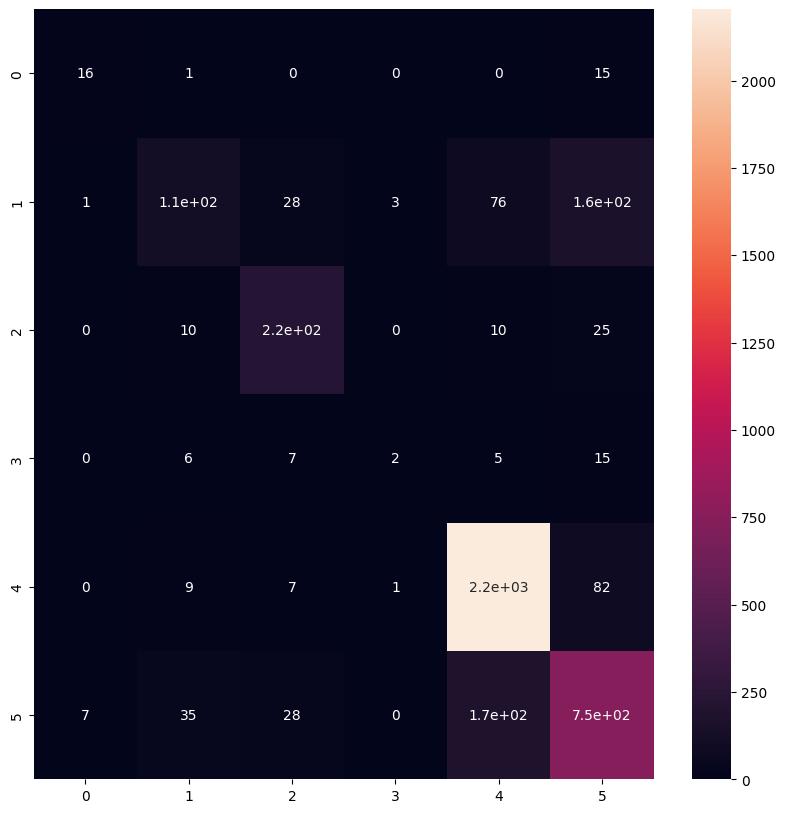

In [134]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,preds),annot=True)
plt.show()

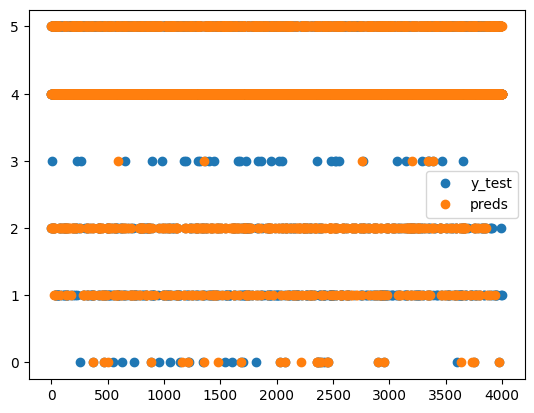

In [141]:
plt.plot(y_test,'o',label='y_test')
plt.plot(preds,'o',label='preds')
plt.legend()
plt.show()

In [92]:
predictions=model.predict(test_data)

In [93]:
predictions

array([5, 4, 1, ..., 5, 5, 4])

In [94]:
predictions=enc.inverse_transform(predictions)

In [100]:
len(predictions)

5000

In [124]:
sub=pd.read_csv('/content/crime-cast-forecasting-crime-categories/sample.csv')
sub

,ID,Crime_Category,Unnamed: 2
0,1,Crimes against Persons,NaN
1,2,Crimes against Public Order,NaN
2,3,Other Crimes,NaN
3,4,Crimes against Public Order,NaN
4,5,Other Crimes,NaN
...,...,...,...
995,996,Fraud and White-Collar Crimes,NaN
996,997,Property Crimes,NaN
997,998,Violent Crimes,NaN
998,999,Property Crimes,NaN


In [125]:
sub = sub.loc[sub.index.repeat(5)].reset_index(drop=True)

In [126]:
sub

,ID,Crime_Category,Unnamed: 2
0,1,Crimes against Persons,NaN
1,1,Crimes against Persons,NaN
2,1,Crimes against Persons,NaN
3,1,Crimes against Persons,NaN
4,1,Crimes against Persons,NaN
...,...,...,...
4995,1000,Violent Crimes,NaN
4996,1000,Violent Crimes,NaN
4997,1000,Violent Crimes,NaN
4998,1000,Violent Crimes,NaN


In [127]:
sub['ID']=[i for i in range(1,5000+1)]

In [128]:
sub.columns

Index(['ID', 'Crime_Category ', 'Unnamed: 2'], dtype='object')

In [129]:
sub['Crime_Category ']=predictions

In [130]:
sub=sub.drop('Unnamed: 2',axis=1)

In [133]:
sub

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Crimes against Public Order
3,4,Property Crimes
4,5,Violent Crimes
...,...,...
4995,4996,Property Crimes
4996,4997,Property Crimes
4997,4998,Violent Crimes
4998,4999,Violent Crimes


In [131]:
sub.to_csv('sub.csv',index=False)